In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
%matplotlib inline

In [159]:
dataset = pd.read_csv('new_churn_data.csv')

In [160]:
user_id= dataset.user

In [161]:
dataset = dataset.drop(columns=['user'])

In [162]:
#one-hot encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [163]:
dataset = pd.get_dummies(dataset)

In [164]:
dataset.columns

Index(['Unnamed: 0', 'churn', 'age', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

In [165]:
# dropping columns to get rid of forced correlated variables
dataset = dataset.drop(columns=['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [166]:
#splitting the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['churn']), dataset.churn, test_size=0.2, random_state = 0)

In [167]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [168]:
#makes binary 0 and 1 50/50
pos_index = y_train[y_train.values==1].index
neg_index = y_train[y_train.values==0].index

In [169]:
if len(pos_index)>len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [170]:
random.seed(0)

In [171]:
higher = np.random.choice(higher, size = len(lower))

In [172]:
lower = np.asarray(lower)

In [173]:
new_index = np.concatenate((lower, higher))

In [174]:
X_train = X_train.loc[new_index, ]
y_train = y_train[new_index]

In [175]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.fit_transform(X_test))

In [176]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [177]:
X_train

,Unnamed: 0,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.229772,-0.615730,-0.356521,-0.287061,-0.594218,-0.356408,-0.166987,-0.909984,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,-0.291803,-0.294166,-0.283253,-0.300517,-0.295063,-0.312958
19766,0.807681,-0.414345,-0.356521,-0.287061,-0.643420,-0.356408,-0.166987,0.322224,0.833883,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,3.426969,-0.294166,-0.283253,-0.300517,-0.295063,-0.312958
8354,-0.659120,0.290506,-0.356521,-0.287061,-0.643420,-0.356408,-0.166987,2.010807,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,-0.291803,-0.294166,-0.283253,-0.300517,-0.295063,3.195314
17883,0.565699,0.592585,-0.356521,-0.287061,0.045409,-0.356408,-0.166987,-0.179786,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,-0.291803,-0.294166,-0.283253,-0.300517,3.389105,-0.312958
25149,1.499445,-0.817116,-0.241880,-0.287061,-0.102198,-0.239485,-0.166987,-0.579113,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,-0.291803,3.399438,-0.283253,-0.300517,-0.295063,-0.312958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24256,1.384687,-0.716423,-0.012599,-0.287061,-0.495814,-0.005637,-0.166987,-0.898575,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,-0.291803,-0.294166,3.530419,-0.300517,-0.295063,-0.312958
18107,0.594485,0.693277,-0.356521,-0.287061,-0.643420,-0.356408,-0.166987,1.109469,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,3.223125,-0.291803,-0.294166,-0.283253,-0.300517,-0.295063,-0.312958
26940,1.729605,-1.219888,0.102042,-0.287061,0.119212,0.111287,-0.166987,-0.156968,-0.053607,-0.071728,...,3.188733,-0.162863,-0.295399,-0.310258,-0.291803,-0.294166,-0.283253,-0.300517,-0.295063,-0.312958
2287,-1.438913,-0.515037,-0.356521,-0.287061,-0.643420,-0.356408,-0.166987,-1.012668,-0.053607,-0.071728,...,-0.313604,-0.162863,-0.295399,-0.310258,-0.291803,-0.294166,-0.283253,-0.300517,-0.295063,3.195314


In [201]:
#fitting model to training section
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [202]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
#predicting test sets
y_predict = classifier.predict(X_test)

In [204]:
#evaluating model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [205]:
cm = confusion_matrix(y_test, y_predict)

In [210]:
accuracy_score(y_test, y_predict)

0.6064814814814815

In [211]:
precision_score(y_test, y_predict)

0.5167743921206525

In [212]:
recall_score(y_test, y_predict)

0.7515666965085049

In [213]:
f1_score(y_test, y_predict)

0.6124384461061463

Test Accuracy Score %60.65


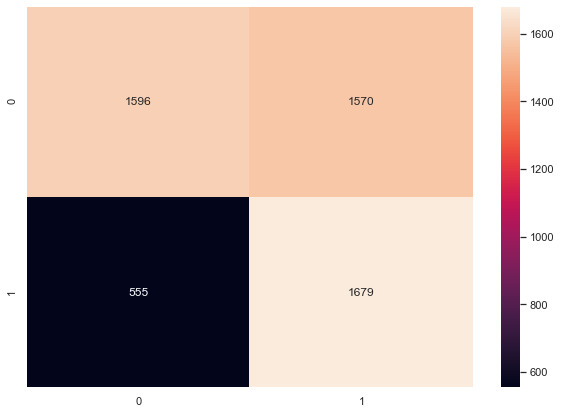

In [214]:
#visualising the confusion matrix
cm_df = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1)
sns.heatmap(cm_df, annot=True, fmt='g')
print("Test Accuracy Score %{:.4}".format((accuracy_score(y_test, y_predict)*100)))

In [215]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score


In [218]:
accuracies = cross_val_score(estimator=classifier,
                            X=X_train, y=y_train, cv=10)

In [220]:
accuracies.mean()

0.6448545861297539

In [225]:
#analyzing coefficients
pd.concat([pd.DataFrame(X_train.columns, columns=['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coefficient'])], axis=1)

,features,coefficient
0,Unnamed: 0,0.000175
1,age,-0.152651
2,deposits,0.655332
3,withdrawal,0.034972
4,purchases_partners,-0.719284
5,purchases,-0.777110
6,cc_taken,0.106300
7,cc_recommended,0.086814
8,cc_disliked,-0.040762
9,cc_liked,0.005327


In [226]:
# feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [227]:
classifier = LogisticRegression()

In [228]:
X_train.shape

(17880, 42)

In [231]:
rfe = RFE(classifier, 20)

In [232]:
rfe = rfe.fit(X_train, y_train)

In [234]:
#summarize the selection of attributes
print(rfe.support_)

[False  True  True  True  True  True  True  True False False False False
  True  True False  True False  True  True  True  True  True  True False
 False  True  True False  True  True False False False False False False
 False False False False False False]


In [236]:
X_train.columns[rfe.ranking_]

Index(['is_referred', 'age', 'age', 'age', 'age', 'age', 'age', 'age',
       'deposits', 'waiting_4_loan', 'cc_taken', 'cancelled_loan', 'age',
       'age', 'reward_rate', 'age', 'purchases_partners', 'age', 'age', 'age',
       'age', 'age', 'age', 'ios_user', 'cc_disliked', 'age', 'age',
       'web_user', 'age', 'age', 'left_for_two_month_plus', 'android_user',
       'registered_phones', 'cc_liked', 'purchases', 'received_loan',
       'rejected_loan', 'cc_application_begin', 'cc_recommended', 'withdrawal',
       'left_for_one_month', 'app_downloaded'],
      dtype='object')

In [239]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
y_predict = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [244]:
cm = confusion_matrix(y_test, y_predict)

In [245]:
accuracy_score(y_test, y_predict)

0.6061111111111112

In [246]:
precision_score(y_test, y_predict)

0.5163959546429666

In [247]:
recall_score(y_test, y_predict)

0.7542524619516562

In [248]:
f1_score(y_test, y_predict)

0.6130616700018192

Test Accuracy Score %60.61


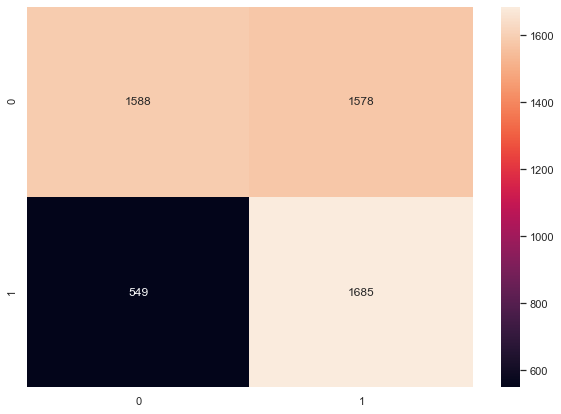

In [249]:
#visualising the confusion matrix
cm_df = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1)
sns.heatmap(cm_df, annot=True, fmt='g')
print("Test Accuracy Score %{:.4}".format((accuracy_score(y_test, y_predict)*100)))

In [250]:
#Analyszing coefficients
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coefficient'])], axis=1)

,features,coefficient
0,age,-0.153467
1,deposits,0.652091
2,withdrawal,0.039099
3,purchases_partners,-0.714055
4,purchases,-0.766942
5,cc_taken,0.102688
6,cc_recommended,0.100219
7,web_user,0.137361
8,ios_user,0.069399
9,registered_phones,0.087425


In [251]:
#Formatting final results
final_results = pd.concat([y_test, user_id], axis=1).dropna()


In [252]:
final_results['predicted_churn'] = y_predict

In [257]:
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index

TypeError: 'method' object is not subscriptable

In [255]:
final_results

<bound method DataFrame.reset_index of         user  churn  predicted_churn
4      61353    1.0                1
7      67679    0.0                0
8      21269    0.0                0
18     69531    0.0                1
22     25997    0.0                0
...      ...    ...              ...
26982  22377    0.0                1
26991  24291    1.0                1
26993  23740    0.0                1
26994  47663    1.0                0
26995  52752    1.0                1

[5400 rows x 3 columns]>

In [258]:
accuracy

0.6064814814814815